In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main'))
from src import preprocessing

Part 1

In [46]:
source = pd.read_csv('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/Updated_Obesity_Dataset.csv')
target_col = source.columns[-1]

In [47]:
#1 Number of features
num_features = source.shape[1] - 1
print(f"Number of features: {num_features}")

Number of features: 16


In [48]:
# 2. Classification or regression problem?
if source[target_col].dtype == "object":
    problem_type = "Classification"
else:
    problem_type = "Regression"
print(f"Problem type: {problem_type}")

Problem type: Classification


In [49]:
# 3. How many data points?
num_data_points = source.shape[0]
print(f"Number of data points: {num_data_points}")

Number of data points: 2111


In [50]:

# 4. Type of features (Quantitative / Categorical)
feature_types = source.dtypes[:-1].apply(lambda x: "Categorical" if x == "object" else "Quantitative")
print("Feature types:\n", feature_types)

Feature types:
 Age                               Quantitative
Gender                             Categorical
Height                            Quantitative
Weight                            Quantitative
CALC                               Categorical
FAVC                               Categorical
FCVC                              Quantitative
NCP                               Quantitative
SCC                                Categorical
SMOKE                              Categorical
CH2O                              Quantitative
family_history_with_overweight     Categorical
FAF                               Quantitative
TUE                               Quantitative
CAEC                               Categorical
MTRANS                             Categorical
dtype: object


In [51]:
# 5. Do you need to encode categorical variables?
needs_encoding = any(feature_types == "Categorical")
print(f"Need to encode categorical variables?: {'Yes' if needs_encoding else 'No'}")

Need to encode categorical variables?: Yes


In [52]:
#Corelation in preprocessing.ipynb after encoding properly

Part 2

Class distribution:
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
The dataset is imbalanced: classes have different number of instances.


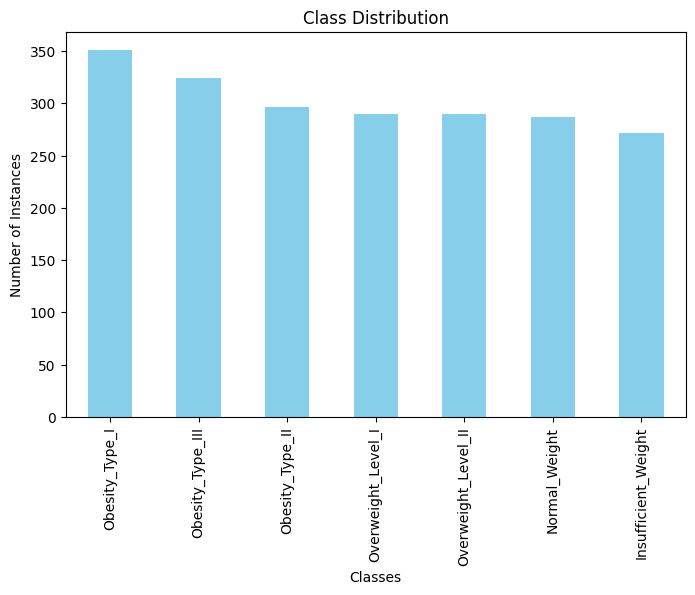

In [53]:
class_counts = source[target_col].value_counts()
print("Class distribution:\n", class_counts)

# 2. Are all classes equally represented?
if class_counts.nunique() == 1:
    print("The dataset is balanced: all classes have equal number of instances.")
else:
    print("The dataset is imbalanced: classes have different number of instances.")

plt.figure(figsize=(8,5))
class_counts.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

Part 3: EDA

In [54]:
numerical_data = source.select_dtypes(include = 'number')

numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 8 numerical features: 

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [55]:
categorical_data = source.select_dtypes(include= 'object')

categorical_features = categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 9 numerical features: 

['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [56]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2090.0,2.009034,0.613164,1.00,1.582010,2.000000,2.479917,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [57]:
categorical_data.describe().T

,count,unique,top,freq
Gender,2100,2,Male,1065
CALC,2111,4,Sometimes,1401
FAVC,2111,2,yes,1866
SCC,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2090,2,yes,1706
CAEC,2111,4,Sometimes,1765
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


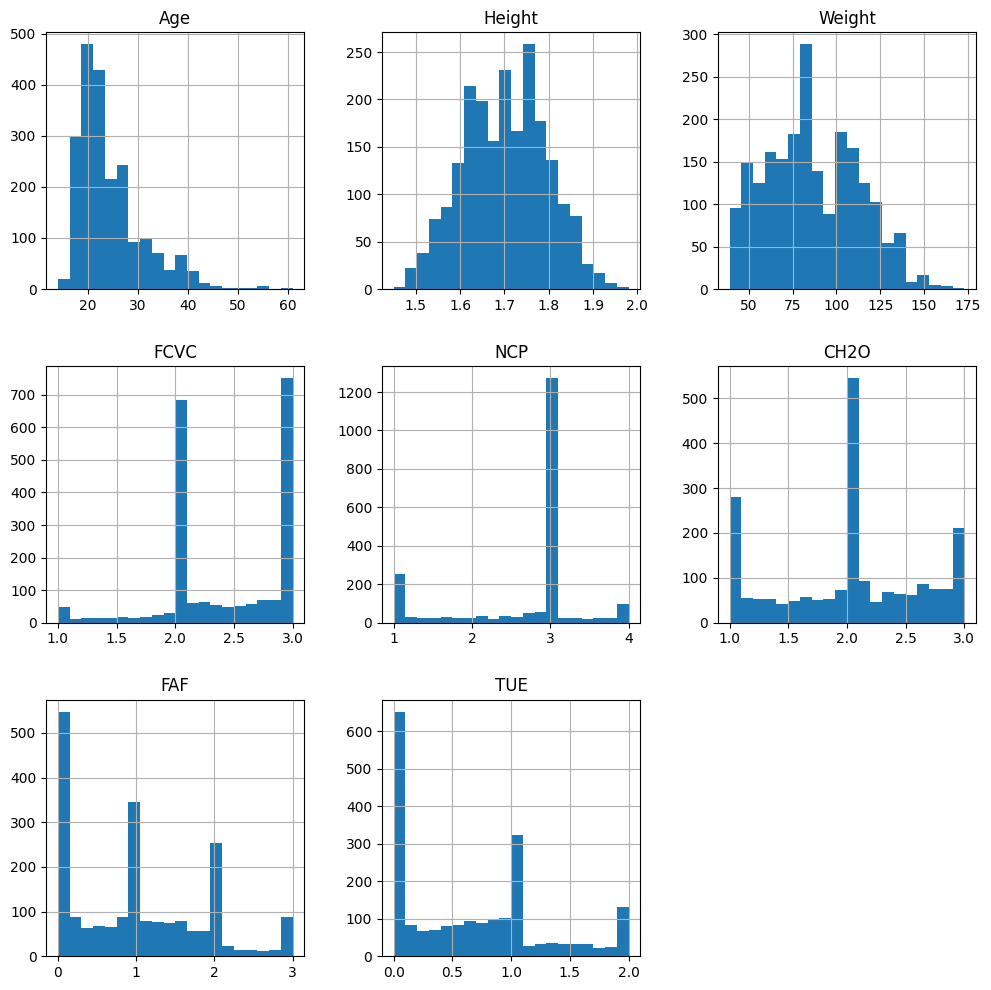

In [58]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()